<a href="https://colab.research.google.com/github/RepnaiaE/Diplom/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xml.dom.minidom as md
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

 
doc = md.parse('/content/drive/MyDrive/Диплом/export.xml')



Mounted at /content/drive


**Обработка и подготовка данных к работе**

In [2]:
xml_list = []
expertise = doc.getElementsByTagName("Record")
for skill in expertise:
  value = (skill.getAttribute("type"),
           skill.getAttribute("unit"),
           skill.getAttribute("startDate"),
           skill.getAttribute("value"))
  xml_list.append(value)

In [3]:
from pandas import DataFrame

df = DataFrame(xml_list, columns=['Type', 'Unit', 'Date', 'value']) 
result_csv = df.to_csv(r'result.csv', index=None, header=True)


In [4]:
result = pd.read_csv ('result.csv')
print (result)

                                                    Type       Unit  \
0                         HKQuantityTypeIdentifierHeight         cm   
1                       HKQuantityTypeIdentifierBodyMass         kg   
2                      HKQuantityTypeIdentifierHeartRate  count/min   
3                      HKQuantityTypeIdentifierHeartRate  count/min   
4                      HKQuantityTypeIdentifierHeartRate  count/min   
...                                                  ...        ...   
435049  HKQuantityTypeIdentifierHeartRateVariabilitySDNN         ms   
435050  HKQuantityTypeIdentifierHeartRateVariabilitySDNN         ms   
435051  HKQuantityTypeIdentifierHeartRateVariabilitySDNN         ms   
435052  HKQuantityTypeIdentifierHeartRateVariabilitySDNN         ms   
435053  HKQuantityTypeIdentifierHeartRateVariabilitySDNN         ms   

                             Date    value  
0       2022-01-28 02:06:24 +0400    175.0  
1       2022-01-28 02:06:24 +0400     74.5  
2       2022

<ipython-input-4-bfa25c021858>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  result = pd.read_csv ('result.csv')


In [5]:
result_df = df.drop(columns='Unit') 
result_df

,Type,Date,value
0,HKQuantityTypeIdentifierHeight,2022-01-28 02:06:24 +0400,175
1,HKQuantityTypeIdentifierBodyMass,2022-01-28 02:06:24 +0400,74.5
2,HKQuantityTypeIdentifierHeartRate,2022-10-06 14:27:37 +0400,68
3,HKQuantityTypeIdentifierHeartRate,2022-10-06 14:33:15 +0400,63
4,HKQuantityTypeIdentifierHeartRate,2022-10-06 14:34:49 +0400,63
...,...,...,...
435049,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,2023-02-14 10:54:39 +0400,70.8155
435050,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,2023-02-14 14:09:42 +0400,66.3166
435051,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,2023-02-14 19:01:52 +0400,78.9438
435052,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,2023-02-15 11:53:22 +0400,42.3813


In [6]:
df_filter = df ['Type']. isin (['HKQuantityTypeIdentifierRestingHeartRate', 'HKQuantityTypeIdentifierHeartRateVariabilitySDNN']) 
result_df = result_df [df_filter]
result_df

,Type,Date,value
358220,HKQuantityTypeIdentifierRestingHeartRate,2022-10-06 00:02:55 +0400,53
358221,HKQuantityTypeIdentifierRestingHeartRate,2022-10-07 00:00:52 +0400,58
358222,HKQuantityTypeIdentifierRestingHeartRate,2022-10-08 00:00:41 +0400,53
358223,HKQuantityTypeIdentifierRestingHeartRate,2022-10-09 00:00:27 +0400,58
358224,HKQuantityTypeIdentifierRestingHeartRate,2022-10-10 00:00:02 +0400,60
...,...,...,...
435049,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,2023-02-14 10:54:39 +0400,70.8155
435050,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,2023-02-14 14:09:42 +0400,66.3166
435051,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,2023-02-14 19:01:52 +0400,78.9438
435052,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,2023-02-15 11:53:22 +0400,42.3813


In [7]:
result_df['value'] = pd.to_numeric(result_df['value'])
result_df['Date'] = pd.to_datetime(result_df['Date'].str.partition(' ')[0])
result_df['Type'] = result_df['Type'].str.replace("HKQuantityTypeIdentifierRestingHeartRate","RHR")
result_df['Type'] = result_df['Type'].str.replace("HKQuantityTypeIdentifierHeartRateVariabilitySDNN","HRV")
result_df

<ipython-input-7-d2e28d4da3c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['value'] = pd.to_numeric(result_df['value'])
<ipython-input-7-d2e28d4da3c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Date'] = pd.to_datetime(result_df['Date'].str.partition(' ')[0])
<ipython-input-7-d2e28d4da3c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,Type,Date,value
358220,RHR,2022-10-06,53.0000
358221,RHR,2022-10-07,58.0000
358222,RHR,2022-10-08,53.0000
358223,RHR,2022-10-09,58.0000
358224,RHR,2022-10-10,60.0000
...,...,...,...
435049,HRV,2023-02-14,70.8155
435050,HRV,2023-02-14,66.3166
435051,HRV,2023-02-14,78.9438
435052,HRV,2023-02-15,42.3813


In [ ]:
from numpy import median
df_new = DataFrame(columns=['Date', 'RHR', 'HRV']) 
df_new['Date'] = result_df[result_df ['Type']. isin (['RHR'])]['Date'].unique()
for i, row in df_new.iterrows():
  df_new.RHR[i] = result_df.value.loc[(result_df.Date == row.Date) & (result_df.Type == "RHR")] .values[0]
  df_new.HRV[i] = result_df.value.loc[(result_df.Date == row.Date) & (result_df.Type == "HRV")].median()
df_new

<Axes: >

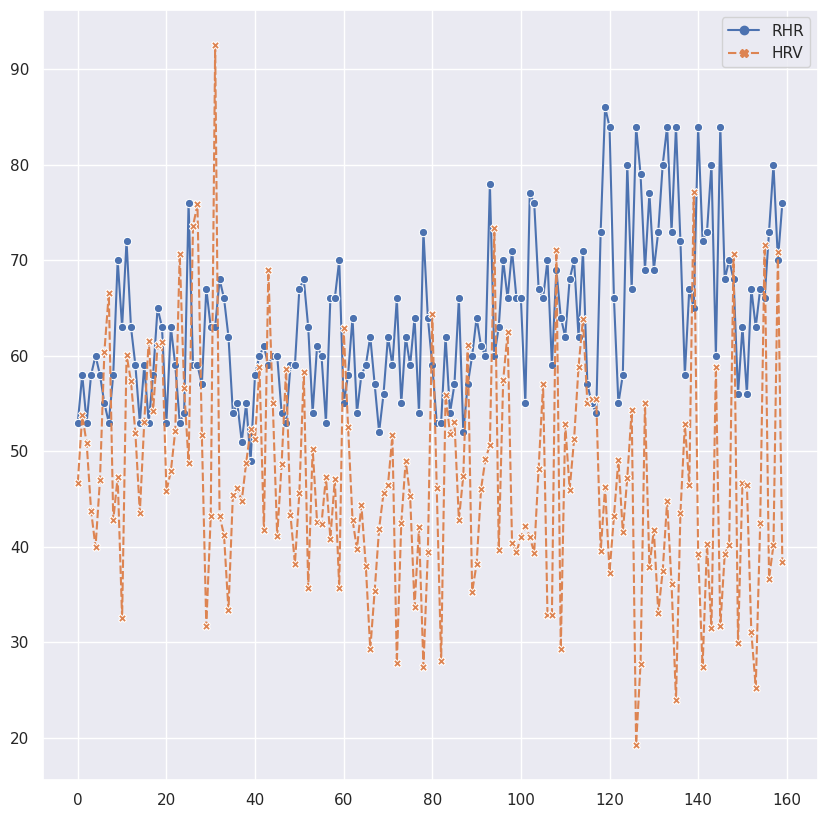

In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(df_new, markers=True)

In [12]:
df_rank = DataFrame(columns=['Rank', 'RHR_value', 'HRV_value','description']) 
description = ['очень плохо','ниже среднего','норма','хорошо','превосходно']
df_rank.description = description
min_RHR = df_new.RHR.min()
max_RHR = df_new.RHR.max()
min_HRV = df_new.HRV.min()
max_HRV = df_new.HRV.max()

i = [1,2,3,4,5]
for j in i:
  df_rank.Rank[j-1] = j
  df_rank.RHR_value[j-1] = min_RHR+(5-j)*(max_RHR-min_RHR)/5
  df_rank.HRV_value[j-1] = min_HRV+j*(max_HRV-min_HRV)/5

In [13]:
#RHR_value указана нижняя граница значений, HRV_value - верхняя граница (т е промежутки от указанных значений снизу вверх)
df_rank

,Rank,RHR_value,HRV_value,description
0,1,78.6,33.90783,очень плохо
1,2,71.2,48.57176,ниже среднего
2,3,63.8,63.23569,норма
3,4,56.4,77.89962,хорошо
4,5,49.0,92.56355,превосходно


In [14]:
df_new ['RHR_Rank'] = ""
df_new ['HRV_Rank'] = ""
for i, row in df_new.iterrows():
  df_new.RHR_Rank[i] = df_rank.Rank.loc[(df_rank.RHR_value <= row.RHR)].values[0]
  df_new.HRV_Rank[i] = df_rank.Rank.loc[(df_rank.HRV_value >= row.HRV)].values[0]

<ipython-input-14-ae28b1904d6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.RHR_Rank[i] = df_rank.Rank.loc[(df_rank.RHR_value <= row.RHR)].values[0]
<ipython-input-14-ae28b1904d6c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.HRV_Rank[i] = df_rank.Rank.loc[(df_rank.HRV_value >= row.HRV)].values[0]


In [ ]:
df_new

,Date,RHR,HRV,RHR_Rank,HRV_Rank
0,2022-10-06,53.0,46.6999,5,2
1,2022-10-07,58.0,53.7403,4,3
2,2022-10-08,53.0,50.8566,5,3
3,2022-10-09,58.0,43.7701,4,2
4,2022-10-10,60.0,39.9342,4,2
...,...,...,...,...,...
155,2023-02-11,66.0,71.62835,3,4
156,2023-02-12,73.0,36.6587,2,2
157,2023-02-13,80.0,40.1959,1,2
158,2023-02-14,70.0,70.8155,3,4


<Axes: >

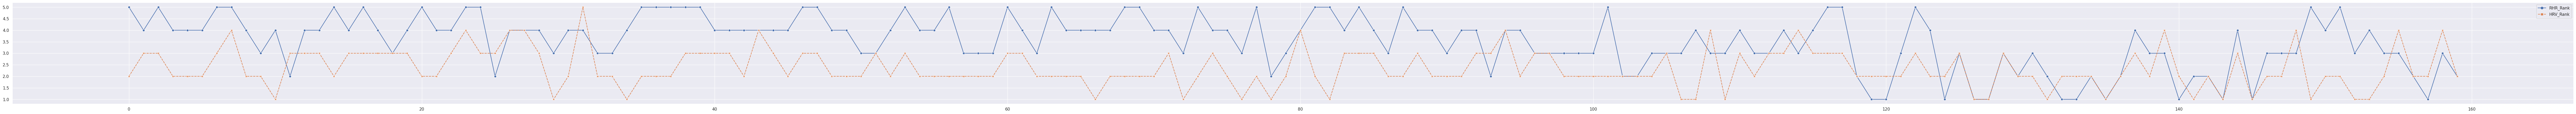

In [15]:
sns.set(rc={'figure.figsize':(125,5)})
sns.lineplot(df_new[["RHR_Rank","HRV_Rank"]], markers=True)

# Метод кредитов

In [16]:
df_new ['Credit_Energy'] = ""
df_new ['Pred_Score'] = ""
df_new.Pred_Score[0] = df_new.RHR_Rank[0]
df_new.Pred_Score[3] = df_new.RHR_Rank[3]
for i, row in df_new.iterrows():
  if (i>=3):
    Credit = df_new.RHR_Rank[i]+((df_new.HRV_Rank[i]-df_new.HRV_Rank[i-1])+(df_new.HRV_Rank[i-1]-df_new.HRV_Rank[i-2])+(df_new.HRV_Rank[i-2]-df_new.HRV_Rank[i-3]))
    if (Credit > 5 or Credit < 1):
      if (Credit < 1):
        df_new.Credit_Energy[i] = Credit - 1
        df_new.Pred_Score[i] = 1
      else:
        df_new.Credit_Energy[i] = Credit - 5
        df_new.Pred_Score[i] = 5
    else:
      df_new.Credit_Energy[i] = 0
      df_new.Pred_Score[i] = Credit
  else:
    df_new.Credit_Energy[i] = 0
    df_new.Pred_Score[i] = df_new.RHR_Rank[i]

<ipython-input-16-0f1f1972171b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.Pred_Score[0] = df_new.RHR_Rank[0]
<ipython-input-16-0f1f1972171b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.Pred_Score[3] = df_new.RHR_Rank[3]
<ipython-input-16-0f1f1972171b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.Credit_Energy[i] = 0
<ipython-input-16-0f1f1972171b>:20: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
df_new

,Date,RHR,HRV,RHR_Rank,HRV_Rank,Credit_Energy,Pred_Score
0,2022-10-06,53.0,46.6999,5,2,0,5
1,2022-10-07,58.0,53.7403,4,3,0,4
2,2022-10-08,53.0,50.8566,5,3,0,5
3,2022-10-09,58.0,43.7701,4,2,0,4
4,2022-10-10,60.0,39.9342,4,2,0,3
...,...,...,...,...,...,...,...
155,2023-02-11,66.0,71.62835,3,4,1,5
156,2023-02-12,73.0,36.6587,2,2,0,3
157,2023-02-13,80.0,40.1959,1,2,0,1
158,2023-02-14,70.0,70.8155,3,4,0,3


<Axes: >

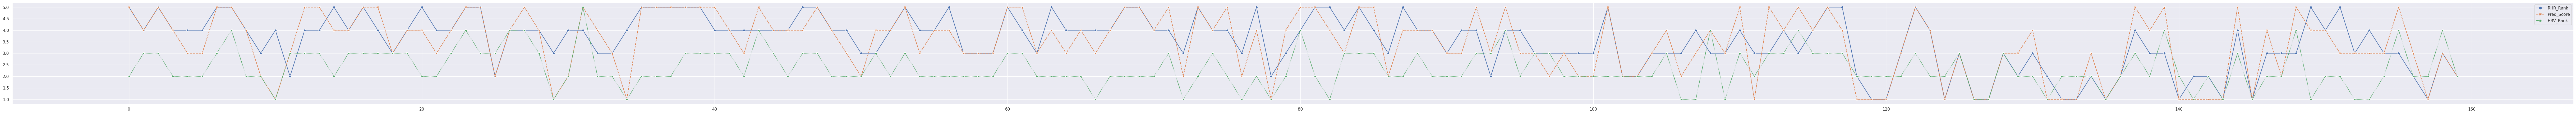

In [ ]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(125,5)})
sns.lineplot(df_new[["RHR_Rank","Pred_Score","HRV_Rank"]], markers=True)

<Axes: >

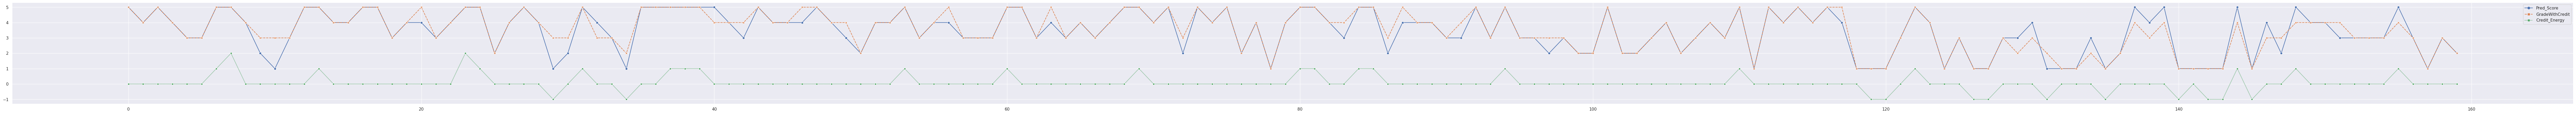

In [ ]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(125,5)})
sns.lineplot(df_new[["Pred_Score","GradeWithCredit","Credit_Energy"]], markers=True)

In [17]:
df_new ['Delta'] = "" #разница между ожидаемой оценкой реальной оценкой RHR
df_new ['Flag'] = ""

for i, row in df_new.iterrows():
  df_new.Delta[i] = df_new.RHR_Rank[i]- df_new.Pred_Score[i]
  df_new.Flag[i] = 0

<ipython-input-17-f46d843f143c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.Delta[i] = df_new.RHR_Rank[i]- df_new.Pred_Score[i]
<ipython-input-17-f46d843f143c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.Flag[i] = 0


In [18]:
df_new ['GradeWithCredit'] = "" #"выравненная" оценка состояния уже с учетом кредитов (оценка САН)
df_new.GradeWithCredit = df_new.Pred_Score
for i, row in df_new.iterrows():
  if (df_new.Credit_Energy[i]!=0):
    balance = df_new.Credit_Energy[i]
    for j in  range(i+3,len(df_new)):
      if (balance !=0 and df_new.Flag[j] != 1):
        if (df_new.Delta[j]>0 and balance>0):
          if (df_new.Delta[j]>=balance):
            df_new.GradeWithCredit[j] = df_new.GradeWithCredit[j] + balance
            balance = 0
            df_new.Flag[j] = 1
          else:
            df_new.GradeWithCredit[j] = df_new.RHR_Rank[j]
            balance = balance - df_new.Delta[j]
            df_new.Flag[j] = 1
        if (df_new.Delta[j]<0 and balance<0):
          if (df_new.Delta[j]<=balance):
            df_new.GradeWithCredit[j] = df_new.GradeWithCredit[j] + balance
            balance = 0
            df_new.Flag[j] = 1
          else:
            df_new.GradeWithCredit[j] = df_new.RHR_Rank[j]
            balance = balance - df_new.Delta[j]
            df_new.Flag[j] = 1

<ipython-input-18-438b40d46418>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.GradeWithCredit[j] = df_new.GradeWithCredit[j] + balance
<ipython-input-18-438b40d46418>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.Flag[j] = 1
<ipython-input-18-438b40d46418>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.GradeWithCredit[j] = df_new.GradeWithCredit[j] + balance
<ipython-input-18-438b40d46418>:21: SettingWit

In [ ]:
df_new

,Date,RHR,HRV,RHR_Rank,HRV_Rank,Credit_Energy,Pred_Score,Delta,Flag,GradeWithCredit
0,2022-10-06,53.0,46.6999,5,2,0,5,0,0,5
1,2022-10-07,58.0,53.7403,4,3,0,4,0,0,4
2,2022-10-08,53.0,50.8566,5,3,0,5,0,0,5
3,2022-10-09,58.0,43.7701,4,2,0,4,0,0,4
4,2022-10-10,60.0,39.9342,4,2,0,3,1,0,3
...,...,...,...,...,...,...,...,...,...,...
155,2023-02-11,66.0,71.62835,3,4,1,5,-2,1,4
156,2023-02-12,73.0,36.6587,2,2,0,3,-1,0,3
157,2023-02-13,80.0,40.1959,1,2,0,1,0,0,1
158,2023-02-14,70.0,70.8155,3,4,0,3,0,0,3


In [ ]:
def accuracy (grade,predict_score,count):
  acc = 0
  score = 0
  for i in range(count):
    if (grade[i] == predict_score[i]):
      acc = acc + 1
  score =  acc/count
  return score

In [ ]:
score = accuracy(df_new.Pred_Score,df_new.GradeWithCredit,len(df_new))
print(score)

0.79375


<Axes: >

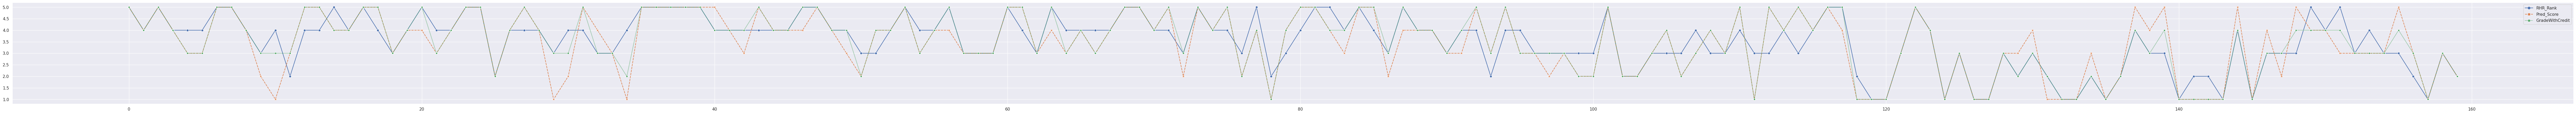

In [ ]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(125,5)})
sns.lineplot(df_new[["RHR_Rank","Pred_Score","GradeWithCredit"]], markers=True)#"ClassHRV","Class","Grade",,"Credit_Energy"

<Axes: >

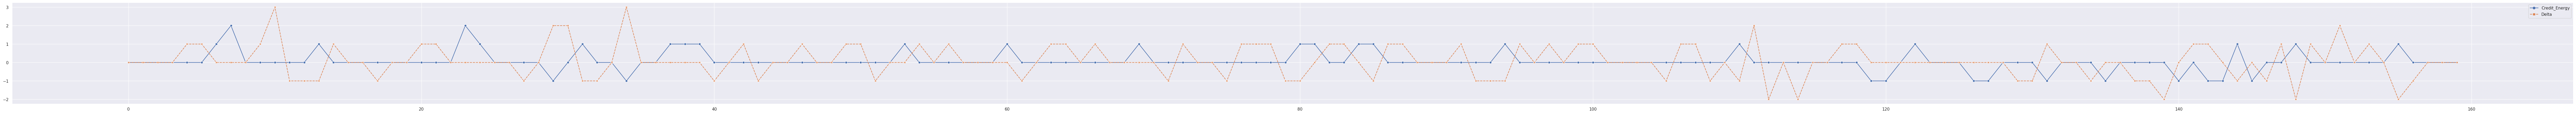

In [ ]:
sns.set(rc={'figure.figsize':(125,5)})
sns.lineplot(df_new[["Credit_Energy","Delta"]], markers=True)

#Градиентный бустинг

In [ ]:
!pip install --upgrade catboost
import catboost
from catboost import * 
from catboost import datasets
from catboost import Pool, CatBoostClassifier

In [19]:
df_for_cat = pd.DataFrame(df_new.drop(columns = ["RHR_Rank",	"HRV_Rank",	"Credit_Energy",	"Pred_Score",	"Delta",	"Flag"]))#df_new["Date","RHR","HRV","GradeWithCredit"], columns = ['Date','RHR','HRV','GradeWithCredit']
df_for_cat

,Date,RHR,HRV,GradeWithCredit
0,2022-10-06,53.0,46.6999,5
1,2022-10-07,58.0,53.7403,4
2,2022-10-08,53.0,50.8566,5
3,2022-10-09,58.0,43.7701,4
4,2022-10-10,60.0,39.9342,3
...,...,...,...,...
155,2023-02-11,66.0,71.62835,4
156,2023-02-12,73.0,36.6587,3
157,2023-02-13,80.0,40.1959,1
158,2023-02-14,70.0,70.8155,3


In [20]:
df_for_cat.rename(columns = {'GradeWithCredit':'Grade'},inplace=True)
for i, row in df_for_cat.iterrows():
  df_for_cat.Date[i] = int(df_for_cat.Date[i].timestamp())
  df_for_cat.RHR[i] = int(df_for_cat.RHR[i])
  df_for_cat.HRV[i] = int(df_for_cat.HRV[i])
  df_for_cat.Grade[i] = int (df_for_cat.Grade[i])
print(df_for_cat)

<ipython-input-20-b8455e2dcf7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_cat.Date[i] = int(df_for_cat.Date[i].timestamp())


           Date RHR HRV Grade
0    1665014400  53  46     5
1    1665100800  58  53     4
2    1665187200  53  50     5
3    1665273600  58  43     4
4    1665360000  60  39     3
..          ...  ..  ..   ...
155  1676073600  66  71     4
156  1676160000  73  36     3
157  1676246400  80  40     1
158  1676332800  70  70     3
159  1676419200  76  38     2

[160 rows x 4 columns]


In [ ]:
df_for_cat

,Date,RHR,HRV,Grade
0,1665014400,53,46,5
1,1665100800,58,53,4
2,1665187200,53,50,5
3,1665273600,58,43,4
4,1665360000,60,39,3
...,...,...,...,...
155,1676073600,66,71,4
156,1676160000,73,36,3
157,1676246400,80,40,1
158,1676332800,70,70,3


In [21]:
train_data = df_for_cat.iloc[28:160] 
test_data = df_for_cat.iloc[0:50]

In [22]:
X_train = train_data.drop(columns = ["Grade"])
Y_train = train_data.drop(columns = ["Date","RHR","HRV"])
X_test = test_data.drop(columns = ["Grade"])
Y_test = test_data.drop(columns = ["Date","RHR","HRV"])

In [23]:
train_pool = Pool(X_train,Y_train)
test_pool = Pool(X_test)

In [27]:
catModel = CatBoostClassifier(iterations=42,learning_rate=1,depth=5,verbose=True)
catModel.fit(train_pool,verbose=True)#,cat_feauters
preds = catModel.predict(test_pool)

0:	learn: 1.0488053	total: 1.24ms	remaining: 50.8ms
1:	learn: 0.9102473	total: 1.97ms	remaining: 39.5ms
2:	learn: 0.7984063	total: 3.06ms	remaining: 39.8ms
3:	learn: 0.7294471	total: 4ms	remaining: 38ms
4:	learn: 0.6661645	total: 4.92ms	remaining: 36.4ms
5:	learn: 0.6090276	total: 5.8ms	remaining: 34.8ms
6:	learn: 0.5656540	total: 6.7ms	remaining: 33.5ms
7:	learn: 0.5151594	total: 7.59ms	remaining: 32.3ms
8:	learn: 0.4576152	total: 8.49ms	remaining: 31.1ms
9:	learn: 0.4220989	total: 9.35ms	remaining: 29.9ms
10:	learn: 0.4054474	total: 10.2ms	remaining: 28.8ms
11:	learn: 0.3876991	total: 11.1ms	remaining: 27.8ms
12:	learn: 0.3667280	total: 12.1ms	remaining: 26.9ms
13:	learn: 0.3557379	total: 12.9ms	remaining: 25.9ms
14:	learn: 0.3355505	total: 13.8ms	remaining: 24.8ms
15:	learn: 0.3211574	total: 14.7ms	remaining: 23.8ms
16:	learn: 0.2935347	total: 15.6ms	remaining: 22.9ms
17:	learn: 0.2739741	total: 16.4ms	remaining: 21.9ms
18:	learn: 0.2558587	total: 17.4ms	remaining: 21ms
19:	learn: 0

In [ ]:
Y_test['Preds'] = preds

<Axes: >

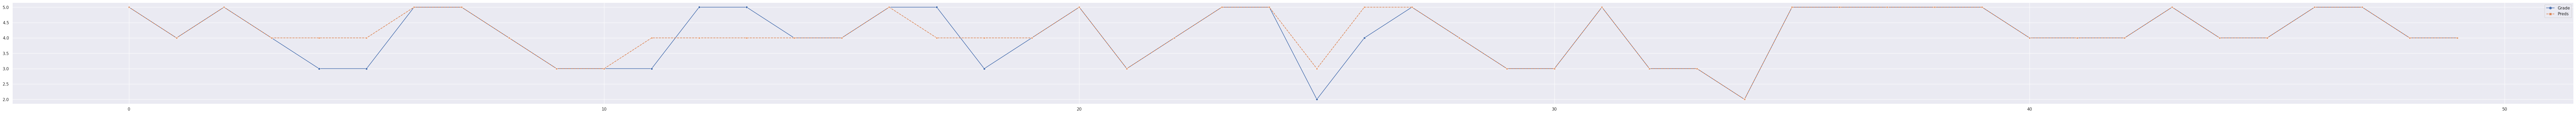

In [ ]:
sns.set(rc={'figure.figsize':(125,5)})
sns.lineplot(Y_test[["Grade","Preds"]], markers=True)

In [ ]:
print (accuracy(Y_test.Grade,Y_test.Preds,50))

0.82


In [ ]:
def warning(df_new,df_pred):
  notice = ""
  score = df_pred.Preds.tail(1)[len(df_pred)-1]
  i = len(df_new)-1
  df_res = df_new['GradeWithCredit'].tail(4)
  res = (df_res[i]-df_res[i-1])+(df_res[i-1]-df_res[i-2])+(df_res[i-2]-df_res[i-3])
  if (res > 0):
    notice = "Отлично! Ваше состояние улучшилось!/n Ваша оценка на сегодня = " + str(score)
  else:
    if (res == 0):
      notice = "Ваше состояние осталось в пределах нормы./n Ваша оценка на сегодня = " + str(score)
    else:
      notice = "Есть риск перетренированности! Необходимо сделать паузу и восстановиться./n Ваша оценка на сегодня = " + str(score)
  return  notice


print (warning(df_new,Y_test))


Есть риск перетренированности! Необходимо сделать паузу и восстановиться./n Ваша оценка на сегодня = 1
